## **Módulo Matéria 04** - Análise de Regressão em Python pt 02

## Trabalhando com duas bases de dados

### 284 Contextualização
<h1>Case de análise de dados de loja de varejo</h1><h2>Tema central</h2><ul><li>Análise de dados de vendas e clientes de loja de varejo para criação de KPIs</li></ul><h2>Tópicos abordados</h2><h3>Revisão do case anterior (mercado imobiliário)</h3><ul><li>Aprendemos a fazer filtros e gráficos</li><li>Introdução à biblioteca Pandas</li><li>Comparações entre Excel, SQL e Python para análise de dados</li></ul><h3>Case atual: loja de varejo</h3><ul><li>Evolução: novas funções e bibliotecas<ul><li>NumPy</li><li>Matplotlib</li><li>Plotly</li></ul></li><li>Objetivo: criar métricas para acompanhar resultados da loja<ul><li>Departamentos mais vendidos</li><li>Média de preço por departamento</li><li>Quantidade de vendas por mês</li><li>Média de renda por canal de venda</li><li>Média de idade por bandeira</li></ul></li><li>Trabalharemos com duas bases de dados<ul><li>Vendas</li><li>Clientes</li></ul></li><li>Tarefas:<ul><li>Tratamento e união das bases</li><li>Construção das métricas solicitadas</li></ul></li></ul><h3>Premissas do negócio</h3><ul><li>Erro no sistema: para vendas sem UF, considerar MS</li><li>Preço não pode ser maior que preço + frete</li></ul><h3>Próximos passos</h3><ul><li>Análise exploratória das bases de dados</li><li>Tratamento dos dados</li><li>Cálculo dos indicadores solicitados</li><li>Validação das premissas de negócio</li></ul>

### 285 Configurando os dados

<h1>Análise Exploratória de Dados de Vendas</h1><h2>Importando bibliotecas e dataset</h2><ul><li>Bibliotecas: Pandas, Seaborn</li><li>Dataset: xlsx com dados de vendas</li></ul><h2>Análise inicial</h2><ul><li>Colunas:<ul><li>id_compra</li><li>id_canal_venda</li><li>bandeira</li><li>data</li><li>preço</li><li>preço_com_frete</li><li>nome_departamento</li><li>estado</li><li>log_cliente</li></ul></li><li>Algumas colunas têm valores nulos</li></ul><h2>Análise detalhada</h2><h3>id_canal_venda</h3><ul><li>Categorias: app, internet, mobile</li><li>Padronização:<ul><li>Substitui &quot;app&quot; por &quot;aplicativo&quot; com <code>.replace()</code></li></ul></li></ul><h3>bandeira</h3><ul><li>Categorias: A, B</li></ul><h3>nome_departamento</h3><ul><li>Várias categorias</li><li>Padronização:<ul><li>Substitui espaços por &quot;_&quot; com <code>.replace()</code></li></ul></li></ul><h3>estado</h3><ul><li>Categorias: siglas dos estados</li></ul><h2>Próximos passos</h2><ul><li>Tratamento dos valores nulos</li><li>Análise mais profunda e geração de insights</li></ul>

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
vendas = pd.read_excel("/content/varejo.xlsx")
vendas.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
0,393835,Mobile,A,2023-03-05,1582.560,791.280,Telefones e Celulares,SP,15042
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478
3,440055,APP,A,2023-01-13,2239.416,2239.416,TVs e Acessorios,SP,2933
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte e Lazer,RS,19790


In [ ]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [ ]:
vendas.groupby("idcanalvenda").idcompra.nunique()

idcanalvenda
APP             139
Aplicativo    21425
Internet      24515
Mobile        24732
Name: idcompra, dtype: int64

In [ ]:
vendas["idcanalvenda"] = vendas["idcanalvenda"].str.replace("APP", "Aplicativo")
vendas.groupby("idcanalvenda").idcompra.nunique()

idcanalvenda
Aplicativo    21539
Internet      24515
Mobile        24732
Name: idcompra, dtype: int64

In [ ]:
vendas.groupby("bandeira").idcompra.nunique()

bandeira
A    27679
B    38483
Name: idcompra, dtype: int64

In [ ]:
vendas.groupby("Nome_Departamento").idcompra.nunique()

Nome_Departamento
Acessorios e Inovacoes     3548
Alimentos                     2
Ar e Ventilacao             951
Audio                      1794
Automotivo                  895
Bebes                      4531
Beleza e Saude             4626
Brinquedos                 1320
Cama, Mesa e Banho          153
Casa e Construcao           263
Cine e Foto                  11
Decoracao                   134
Eletrodomesticos          10501
Eletroportateis            9593
Esporte e Lazer             531
Ferramentas                1111
Games                       764
Informatica                5290
Instrumentos Musicais         1
Linha Industrial             86
Malas e Mochilas            114
Moda                          3
Moveis                     4175
Perfumaria                  624
Pet Shop                     43
Produtos de Limpeza         713
Relogios                    134
TV e Video                    5
TVs e Acessorios           5326
Tablets                    1770
Telefones e Celulares 

In [ ]:
vendas.groupby("estado").idcompra.nunique()

estado
AC       10
AL      461
AM       15
AP        3
BA     2028
CE     1007
DF     1902
ES     1254
GO     1603
MA      129
MG    10538
MT      510
PA      108
PB      536
PE     1632
PI      247
PR     2754
RJ    16213
RN      463
RO       15
RR        7
RS     4099
SC     1932
SE      340
SP    25962
TO      101
Name: idcompra, dtype: int64

In [ ]:
vendas["Nome_Departamento"] = vendas["Nome_Departamento"].str.replace(" ", "_")
vendas.groupby("Nome_Departamento").idcompra.nunique()

Nome_Departamento
Acessorios_e_Inovacoes     3548
Alimentos                     2
Ar_e_Ventilacao             951
Audio                      1794
Automotivo                  895
Bebes                      4531
Beleza_e_Saude             4626
Brinquedos                 1320
Cama,_Mesa_e_Banho          153
Casa_e_Construcao           263
Cine_e_Foto                  11
Decoracao                   134
Eletrodomesticos          10501
Eletroportateis            9593
Esporte_e_Lazer             531
Ferramentas                1111
Games                       764
Informatica                5290
Instrumentos_Musicais         1
Linha_Industrial             86
Malas_e_Mochilas            114
Moda                          3
Moveis                     4175
Perfumaria                  624
Pet_Shop                     43
Produtos_de_Limpeza         713
Relogios                    134
TV_e_Video                    5
TVs_e_Acessorios           5326
Tablets                    1770
Telefones_e_Celulares 

### 286 Tratamento de nulos
<h1>Tratamento de nulos</h1><h2>Identificando nulos</h2><ul><li>Usando a função <code>.info()</code> para verificar colunas nulas</li><li>Função <code>isna()</code> para filtrar linhas nulas</li></ul><h2>Opções de tratamento</h2><ul><li><strong>Eliminar</strong> linhas nulas<ul><li><code>.dropna()</code> elimina linhas com qualquer valor nulo</li></ul></li><li><strong>Substituir</strong> valor nulo<ul><li><code>.fillna()</code> preenche nulos com um valor</li><li>Pode substituir pela <strong>média</strong>, <strong>mediana</strong> ou outro valor fixo</li></ul></li></ul><h2>Decisões de negócio</h2><ul><li>Às vezes não há regra de negócio para tratamento de nulos<ul><li>Precisamos tomar uma decisão</li></ul></li><li>Exemplos<ul><li>Substituir nulos em preço pela <strong>média</strong> ou <strong>mediana</strong></li><li>Considerar nulos em UF como sendo do <strong>Mato Grosso do Sul</strong></li></ul></li></ul><h2>Importância</h2><ul><li>Nulos podem levar a conclusões erradas</li><li>Limpeza dos dados é primeira etapa da análise</li></ul><p>Esse é um resumo dos principais pontos abordados no vídeo sobre identificação e tratamento de valores nulos em uma base de dados. O tema central é o tratamento adequado de missing values, trazendo opções e a importância de tomar decisões assertivas baseadas nas regras de negócio.</p>

In [ ]:
vendas[vendas["estado"].isnull()]

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
96,382380,Internet,A,2023-04-26,NaN,879.200,Telefones_e_Celulares,NaN,5804
284,346055,Internet,A,2023-03-23,NaN,87.648,Ar_e_Ventilacao,NaN,16359
402,172555,Mobile,A,2023-03-19,NaN,135.840,Ar_e_Ventilacao,NaN,13691
411,446380,Mobile,A,2023-03-09,NaN,1703.120,Eletrodomesticos,NaN,13024
770,40425,Mobile,B,2023-04-21,NaN,1759.200,Telefones_e_Celulares,NaN,9121
...,...,...,...,...,...,...,...,...,...
78610,399680,Aplicativo,A,2023-04-19,NaN,339.912,Eletroportateis,NaN,20873
78718,320895,Mobile,B,2023-01-20,NaN,1000.800,Telefones_e_Celulares,NaN,17772
79465,389240,Aplicativo,A,2023-01-14,NaN,279.200,Eletrodomesticos,NaN,20399
79548,124585,Mobile,A,2023-04-21,NaN,2051.240,TVs_e_Acessorios,NaN,17784


In [ ]:
# Sem nulos
vendas_sem_nulos = vendas.dropna()
vendas_sem_nulos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79926 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           79926 non-null  int64         
 1   idcanalvenda       79926 non-null  object        
 2   bandeira           79926 non-null  object        
 3   Data               79926 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    79926 non-null  float64       
 6   Nome_Departamento  79926 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        79926 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 6.1+ MB


In [ ]:
# Preenchendo nulos
vendas["estado"].fillna("MS", inplace = True)
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [ ]:
# Media preenchendo os valores nulos de preço
media_preco = vendas["Preço"].mean()
vendas["Preço"].fillna(media_preco, inplace=True)
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              80228 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [ ]:
media_preco

906.5891285439033

In [ ]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              80228 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [ ]:
# Ponto médio
mediana_preco = vendas["Preço"].median()
mediana_preco


532.448

### 287 Filtrando os dados
<h1>Análise Exploratória de Dados</h1><h2>Limpeza dos dados</h2><ul><li>Eliminação de valores nulos</li><li>Correção de inconsistências<ul><li>Ex: preço não pode ser maior que preço com frete</li></ul></li></ul><h2>Análise Descritiva</h2><ul><li>Função describe()<ul><li>Analisa estatísticas como média, desvio padrão, valores mínimos e máximos</li></ul></li></ul><h2>Filtros</h2><ul><li>Função query()<ul><li>Faz filtros nos dados<ul><li>Por departamento</li><li>Por estado</li><li>Outras categorias</li></ul></li></ul></li><li>Permite análise específica em subconjuntos dos dados</li></ul><h2>Métricas Analisadas</h2><h3>Departamentos mais vendidos</h3><ul><li>Agrupamento pelo nome do departamento</li><li>Contagem única de vendas por departamento</li></ul><h3>Média preço por departamento</h3><ul><li>Agrupamento pelo nome do departamento</li><li>Média do preço com frete</li></ul><h3>Total de vendas por mês</h3><ul><li>Extração do mês a partir da data</li><li>Agrupamento pelo mês</li><li>Contagem do total de vendas</li></ul><h2>Próximos Passos</h2><ul><li>União entre tabelas</li><li>Resposta às métricas finais</li></ul>

In [ ]:
vendas.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
0,393835,Mobile,A,2023-03-05,1582.560,791.280,Telefones_e_Celulares,SP,15042
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478
3,440055,Aplicativo,A,2023-01-13,2239.416,2239.416,TVs_e_Acessorios,SP,2933
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte_e_Lazer,RS,19790


In [ ]:
vendas[["Preço", "Preço_com_frete"]].describe()

,Preço,Preço_com_frete
count,80228.000000,80228.000000
mean,906.589129,908.619823
std,1057.611490,1057.583101
min,6.320000,6.320000
25%,147.920000,150.706000
50%,532.448000,535.120000
75%,1199.200000,1215.240000
max,14439.240000,14439.240000


In [ ]:
preco_errado = vendas.query("Preço > Preço_com_frete")
vendas_correto = vendas.query("Preço < Preço_com_frete")
vendas_correto.describe()

,idcompra,Data,Preço,Preço_com_frete,cliente_Log
count,22047.000000,22047,22047.000000,22047.000000,22047.000000
mean,253799.955550,2023-03-02 05:19:31.261395968,549.518401,567.332688,13856.313013
min,25.000000,2023-01-02 00:00:00,8.720000,9.512000,1.000000
25%,127670.000000,2023-02-01 00:00:00,93.528000,100.800000,6858.000000
50%,257885.000000,2023-03-02 00:00:00,183.200000,193.912000,13845.000000
75%,379705.000000,2023-04-01 00:00:00,661.680000,676.736000,20801.000000
max,499960.000000,2023-04-30 00:00:00,14391.200000,14407.120000,27982.000000
std,144794.628563,NaN,846.295127,863.458763,8049.120135


In [ ]:
vendas_correto.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060


In [ ]:
vendas_correto.query("Nome_Departamento == 'Esporte_e_Lazer' and estado == 'SP'").describe()

,idcompra,Data,Preço,Preço_com_frete,cliente_Log
count,168.000000,168,168.000000,168.00000,168.000000
mean,265130.744048,2023-03-05 23:51:25.714285824,1070.083095,1098.71319,14368.571429
min,2145.000000,2023-01-02 00:00:00,10.896000,16.11200,210.000000
25%,157955.000000,2023-02-03 18:00:00,527.200000,545.32000,7717.500000
50%,253702.500000,2023-03-07 00:00:00,1108.008000,1136.24800,15281.000000
75%,380616.250000,2023-04-09 00:00:00,1599.200000,1618.88400,20538.000000
max,496910.000000,2023-04-30 00:00:00,2399.200000,2432.74400,27837.000000
std,140435.252208,NaN,617.138494,620.66244,7890.233136


In [ ]:
vendas_correto.groupby("Nome_Departamento").idcompra.nunique().sort_values(ascending= False)

Nome_Departamento
Bebes                     4353
Eletrodomesticos          4201
Eletroportateis           2223
Moveis                    2036
Utilidades_Domesticas     1366
Acessorios_e_Inovacoes    1243
Beleza_e_Saude            1054
Brinquedos                 686
Perfumaria                 563
Produtos_de_Limpeza        522
Telefones_e_Celulares      493
Automotivo                 457
Esporte_e_Lazer            446
Audio                      374
Ar_e_Ventilacao            337
Ferramentas                287
Informatica                284
Games                      200
TVs_e_Acessorios           158
Decoracao                  127
Malas_e_Mochilas            91
Cama,_Mesa_e_Banho          71
Tablets                     64
Casa_e_Construcao           58
Relogios                    45
Pet_Shop                    40
Linha_Industrial             9
Cine_e_Foto                  8
Moda                         3
Alimentos                    2
Instrumentos_Musicais        1
Name: idcompra, dtype

In [ ]:
round(vendas_correto.groupby("Nome_Departamento")["Preço_com_frete"].agg("mean").sort_values(ascending=False).reset_index(),2)

,Nome_Departamento,Preço_com_frete
0,TVs_e_Acessorios,3469.38
1,Informatica,2159.78
2,Linha_Industrial,2027.11
3,Cine_e_Foto,1851.20
4,Telefones_e_Celulares,1442.19
5,Eletrodomesticos,1400.66
6,Esporte_e_Lazer,1123.14
7,Tablets,1100.23
8,Games,942.90
9,Instrumentos_Musicais,834.61


In [ ]:
# Mês mais vendido
vendas_correto.groupby("Data").idcompra.nunique().sort_values(ascending=False)

Data
2023-02-13    226
2023-01-20    218
2023-03-07    215
2023-03-30    214
2023-02-20    214
             ... 
2023-02-15    162
2023-04-04    162
2023-02-25    161
2023-02-22    156
2023-02-12    152
Name: idcompra, Length: 119, dtype: int64

In [ ]:
# Colocar mês
vendas_correto["mes"] = vendas_correto["Data"].dt.month
vendas_correto.head()

<ipython-input-80-7c8346fa716f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vendas_correto["mes"] = vendas_correto["Data"].dt.month


,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,mes
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,3
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,2
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662,3
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060,2


In [ ]:
vendas_correto.groupby("mes").idcompra.nunique().sort_values(ascending= False)

mes
3    5590
4    5454
1    5309
2    5138
Name: idcompra, dtype: int64

### 288 Realizando join
<h1>Tema central: Análise de dados de vendas e clientes</h1><h2>Importação da segunda base de dados (clientes)</h2><ul><li>Importação usando pd.read_excel, com o nome &quot;cliente&quot;</li><li>Análise das colunas: idade, renda e cliente_log (em comum com a primeira base)</li></ul><h2>Preparação dos dados</h2><ul><li>Conversão da coluna renda para float</li><li>Verificação de dados nulos (não há)</li></ul><h2>Join das duas bases</h2><ul><li>No Excel: usar PROCV para unir pelo cliente_log</li><li>No SQL:<ul><li>LEFT JOIN</li><li>ON venda.cliente_log = cliente.cliente_log</li></ul></li><li>No Python:<ul><li>Criar tabela vendas_cliente</li><li>venda.merge(cliente, how=&quot;left&quot;, on=&quot;cliente_log&quot;)</li></ul></li></ul><h2>Respostas das métricas</h2><ul><li>Média de renda por canal: groupby e agg<ul><li>Maior: aplicativo</li><li>Segundo: mobile</li><li>Terceiro: internet</li></ul></li><li>Média de idade por bandeira: groupby e agg<ul><li>Bandeira A: 53.30 anos</li><li>Bandeira B: 53.29 anos (muito próximas)</li></ul></li></ul><h2>Próximos passos</h2><ul><li>Bibliotecas de visualização de dados</li><li>Gráficos no Excel e Python</li></ul>

In [ ]:
cliente = pd.read_excel("/content/cliente_varejo.xlsx")
cliente.head()

,cliente_Log,idade,renda
0,15042,89,11337
1,17590,54,2050
2,15478,47,8258
3,2933,39,4671
4,19790,26,9207


In [ ]:
vendas_correto.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,mes
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,3
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,2
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662,3
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060,2


In [ ]:
cliente[["idade", "renda"]].describe()

,idade,renda
count,26425.000000,26425.000000
mean,53.412564,8241.470350
std,20.698825,3899.871482
min,18.000000,1500.000000
25%,35.000000,4859.000000
50%,53.000000,8234.000000
75%,71.000000,11629.000000
max,89.000000,15000.000000


In [ ]:
cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   cliente_Log  26425 non-null  int64
 1   idade        26425 non-null  int64
 2   renda        26425 non-null  int64
dtypes: int64(3)
memory usage: 619.5 KB


In [ ]:
cliente = cliente.astype({"renda":"float"})
cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cliente_Log  26425 non-null  int64  
 1   idade        26425 non-null  int64  
 2   renda        26425 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 619.5 KB


In [ ]:
vendas_cliente = vendas_correto.merge(cliente, how = "left", on = "cliente_Log")
vendas_cliente.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,mes,idade,renda
0,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,3,47,8258.0
1,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3,26,9207.0
2,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3,58,9204.0
3,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3,48,2796.0
4,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,2,78,6596.0


In [ ]:
agg_idcanal_renda = round(vendas_cliente.groupby("idcanalvenda")["renda"].agg("mean").sort_values(ascending=False).reset_index(),2)
agg_idcanal_renda

,idcanalvenda,renda
0,Aplicativo,8244.85
1,Mobile,8222.72
2,Internet,8211.84


In [ ]:
agg_idade_bandeira = round(vendas_cliente.groupby("bandeira")["idade"].agg("mean").sort_values(ascending=False).reset_index(),2)
agg_idade_bandeira

,bandeira,idade
0,A,53.30
1,B,53.29


### 289 Transformando em visualizações I
<p>TEMA CENTRAL: Visualização de dados com Python</p><h1>Bibliotecas</h1><ul><li>Matplotlib<ul><li>Permite criar diversos tipos de gráficos</li></ul></li><li>Plotly<ul><li>Outra biblioteca popular para visualização de dados</li></ul></li></ul><h2>Gráfico de barras</h2><ul><li>Plota categorias no eixo X e valores no eixo Y</li><li>Útil para comparar valores entre categorias</li><li>Exemplos<ul><li>Média de idade por bandeira</li><li>Renda média por canal de venda</li></ul></li></ul><h2>Gráfico de linhas</h2><ul><li>Plota dados temporal no eixo X e valores no eixo Y</li><li>Útil para analisar tendências ao longo do tempo</li><li>Exemplos<ul><li>Quantidade de vendas por dia</li><li>Preço médio com frete por departamento</li></ul></li></ul><h2>Personalização</h2><ul><li>É possível personalizar vários aspectos dos gráficos<ul><li>Título, legendas, cores, tamanho da fonte etc.</li></ul></li><li>Permite destacar os pontos mais importantes</li></ul><h2>Conclusão</h2><ul><li>As bibliotecas de visualização fornecem flexibilidade na criação de gráficos</li><li>É importante escolher o tipo certo de gráfico para cada análise</li><li>A personalização ajuda a transmitir insights de forma mais efetiva</li></ul>

In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Média de idade por bandeira')

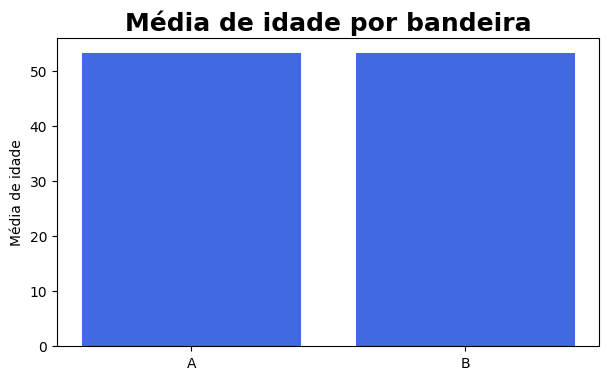

In [ ]:
fig = plt.figure(figsize=(7,4))
plt.bar(agg_idade_bandeira["bandeira"], agg_idade_bandeira["idade"], color="royalblue")
plt.ylabel("Média de idade")
plt.title("Média de idade por bandeira", loc= "center", fontsize = 18, fontweight = "bold", color = "black")

Text(0.5, 1.0, 'Renda média por canal de venda')

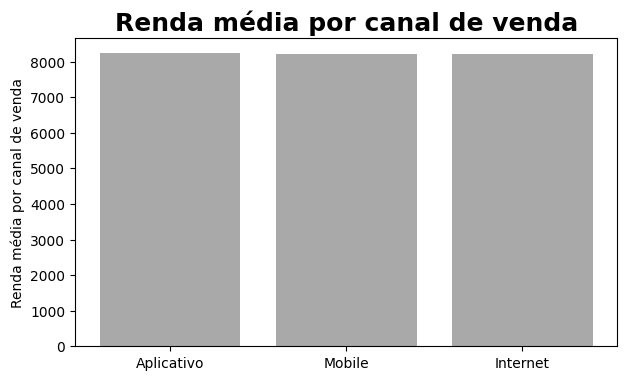

In [ ]:
fig=plt.figure(figsize=(7,4))
plt.bar(agg_idcanal_renda["idcanalvenda"], agg_idcanal_renda["renda"], color="darkgray")
plt.ylabel("Renda média por canal de venda")
plt.title("Renda média por canal de venda")
plt.title("Renda média por canal de venda", loc = "center", fontsize=18, fontweight = "bold", color = "black")

In [ ]:
venda_por_data = vendas_correto.groupby("Data").idcompra.nunique().reset_index()
venda_por_data

,Data,idcompra
0,2023-01-02,193
1,2023-01-03,163
2,2023-01-04,188
3,2023-01-05,204
4,2023-01-06,198
...,...,...
114,2023-04-26,200
115,2023-04-27,212
116,2023-04-28,192
117,2023-04-29,187


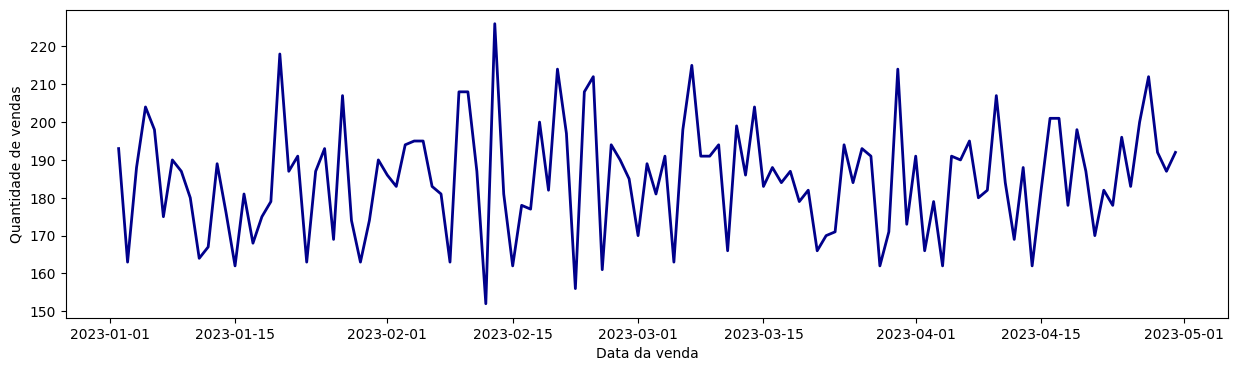

In [ ]:
fig = plt.figure(figsize=(15,4))

plt.xlabel("Data da venda")
plt.ylabel("Quantidade de vendas")
x = venda_por_data["Data"]
y = venda_por_data["idcompra"]

plt.plot(x,y, color = "darkblue", linewidth = "2")
plt.show()


In [ ]:
agg_dept_preco = round(vendas_correto.groupby("Nome_Departamento")["Preço_com_frete"].agg("mean").sort_values(ascending=False).reset_index(),2)
agg_dept_preco

,Nome_Departamento,Preço_com_frete
0,TVs_e_Acessorios,3469.38
1,Informatica,2159.78
2,Linha_Industrial,2027.11
3,Cine_e_Foto,1851.20
4,Telefones_e_Celulares,1442.19
5,Eletrodomesticos,1400.66
6,Esporte_e_Lazer,1123.14
7,Tablets,1100.23
8,Games,942.90
9,Instrumentos_Musicais,834.61


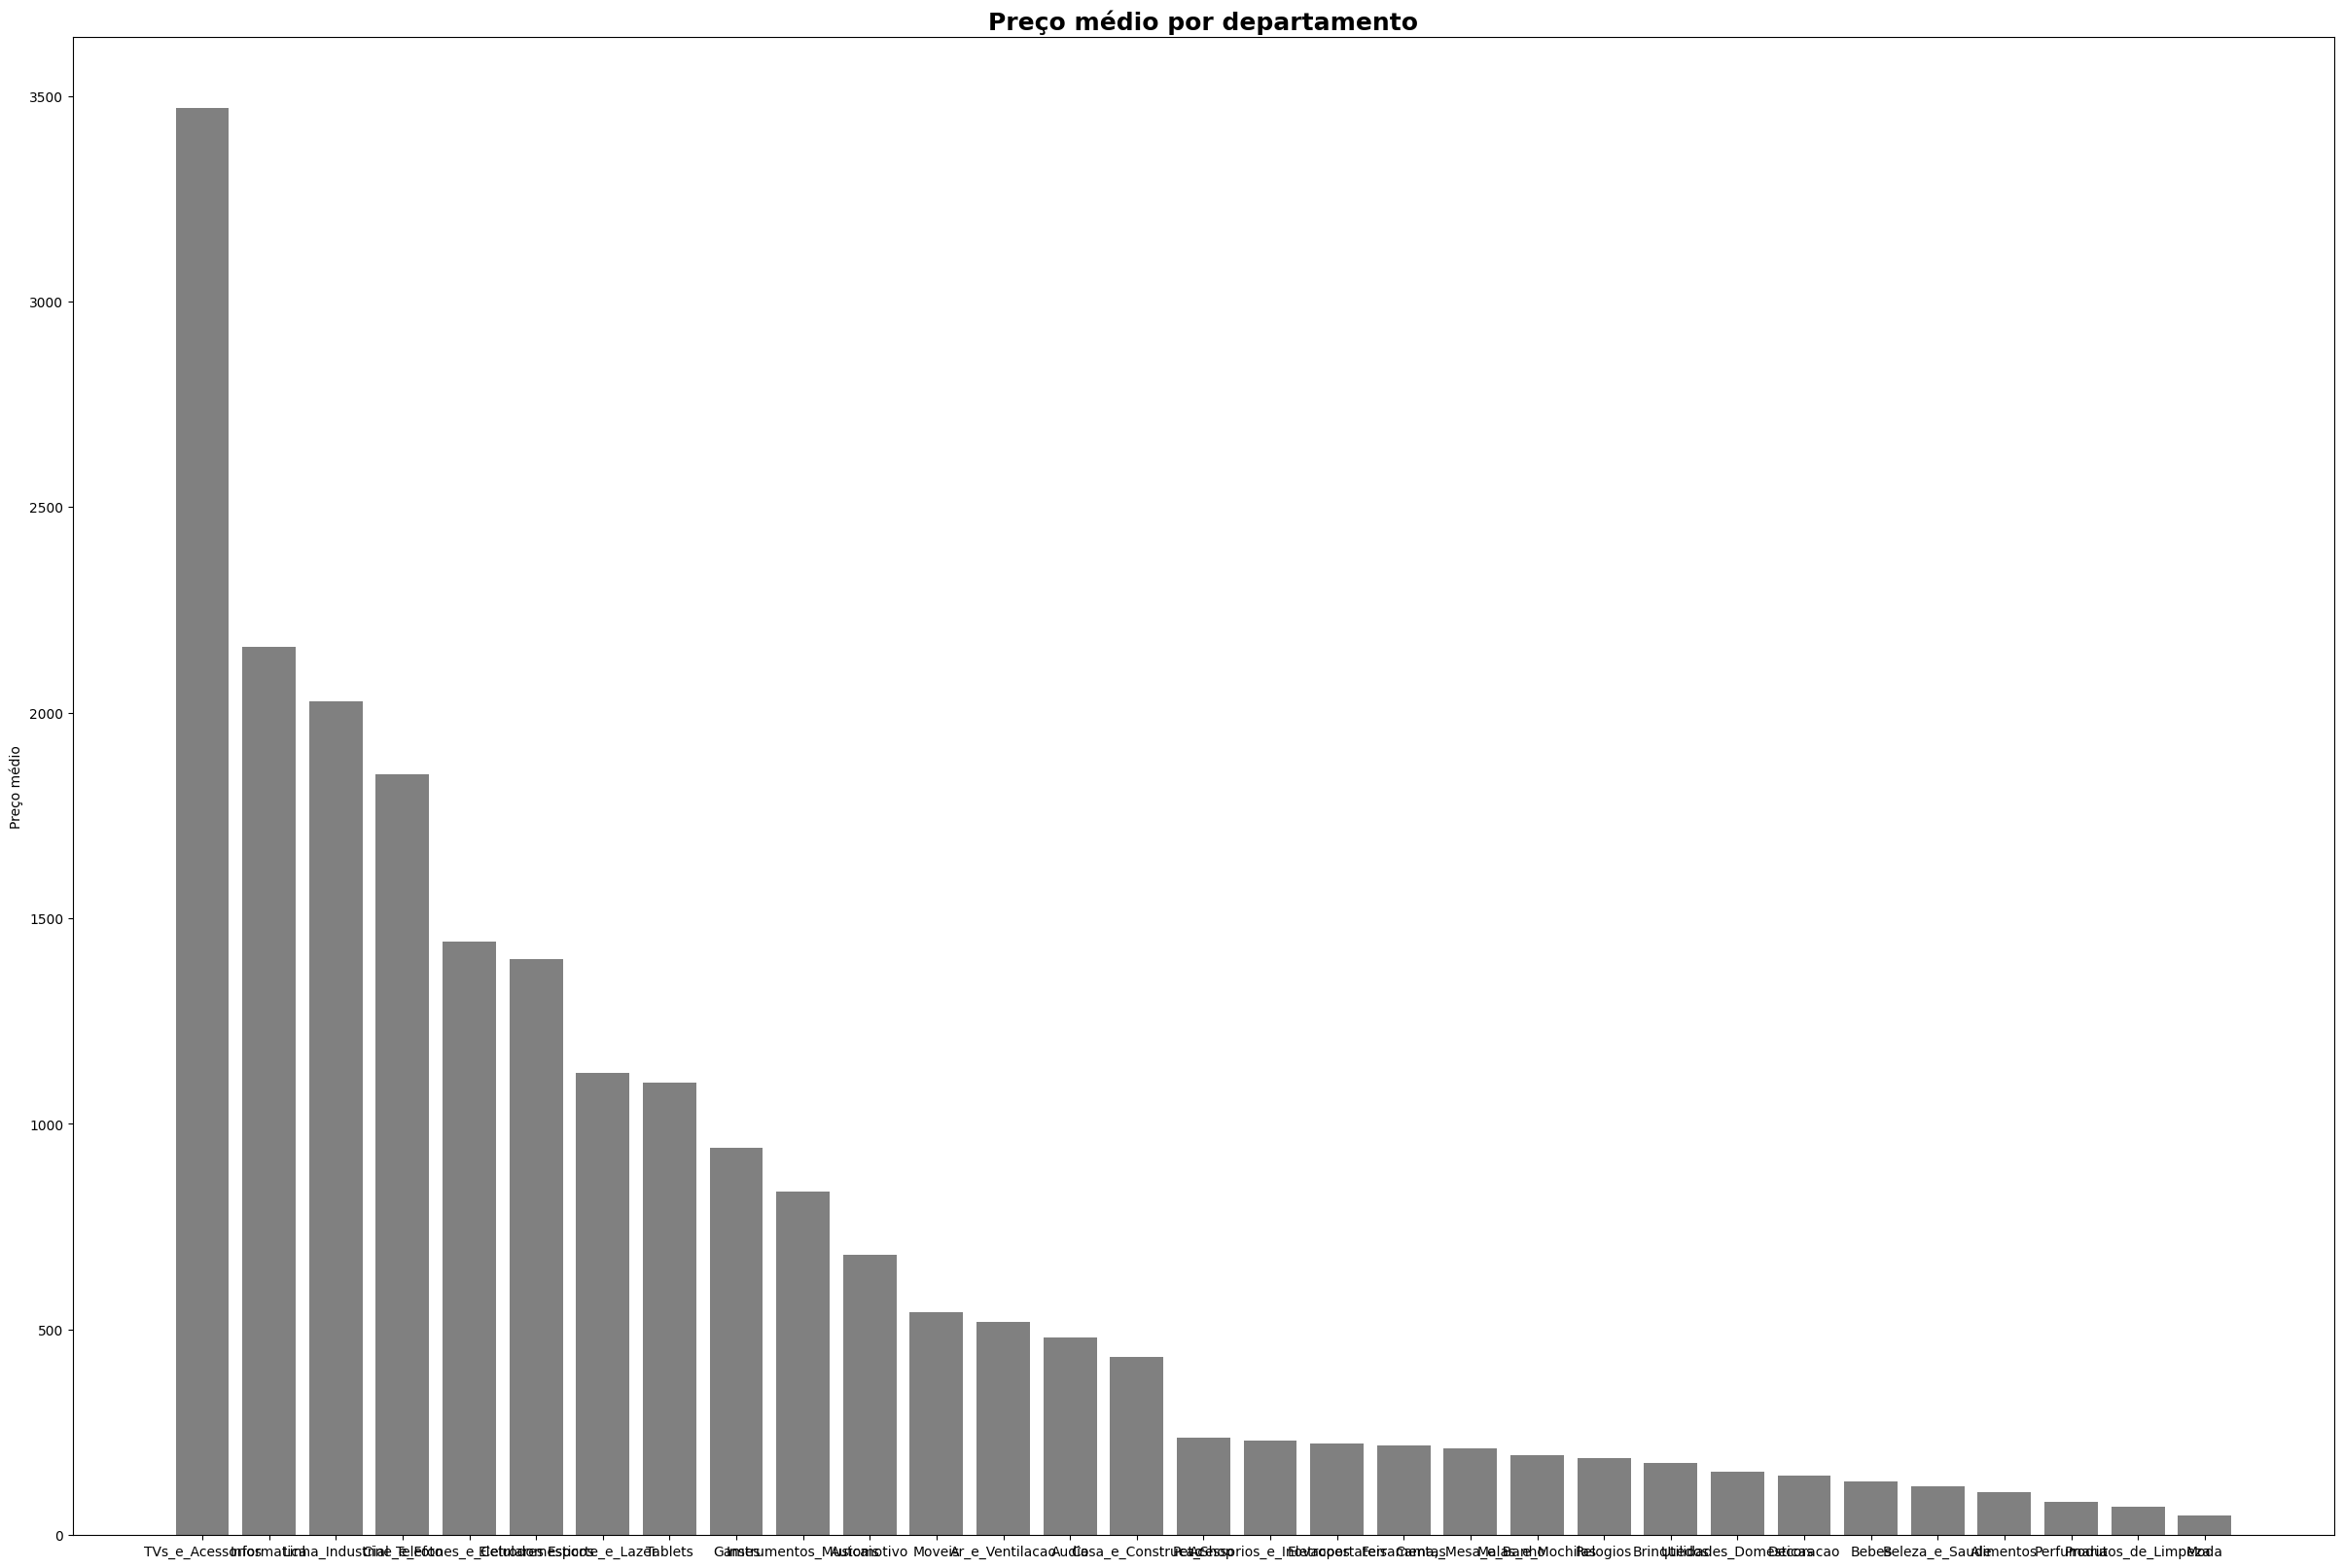

In [ ]:
fig = plt.figure(figsize=(30,20))
plt.bar(agg_dept_preco["Nome_Departamento"], agg_dept_preco["Preço_com_frete"], color= "gray")
plt.ylabel("Preço médio")
plt.title("Preço médio por departamento", loc="center", fontsize=18, fontweight="bold", color="black");

### 290 Transformando em visualizações II
<h1>Utilizando bibliotecas de visualização de dados</h1><h2>MadPlotLib</h2><ul><li>Primeira biblioteca a surgir</li><li>Muito utilizada</li></ul><h2>Plotly</h2><ul><li>Biblioteca mais robusta e sofisticada</li><li>Mais recursos</li></ul><h3>Importando Plotly</h3><ul><li>Instalação via pip</li><li>Importação das bibliotecas</li></ul><h3>Funcionalidades</h3><ul><li>Gráficos mais interativos<ul><li>Mostra valores ao passar mouse</li><li>Permite zoom em áreas específicas</li></ul></li><li>Fácil construção<ul><li>Sintaxe simples, similar ao Seaborn</li><li>Ajusta automaticamente tamanho e escalas</li></ul></li><li>Personalização<ul><li>Mudar cores</li><li>Filtrar dados exibidos</li></ul></li><li>Exportar imagens<ul><li>Salvar como figura</li><li>Colar em apresentações</li></ul></li></ul><h3>Vantagens</h3><ul><li>Análise mais assertiva e insights mais robustos</li><li>Visualização facilita a compreensão</li><li>Alternativa melhor que tabelas extensas</li></ul><h2>Resumo</h2><p>Foram apresentadas bibliotecas de visualização de dados:</p><ul><li>MadPlotLib: muito utilizada e primeira a surgir</li><li>Plotly: mais robusta, traz mais recursos para análises</li></ul><p>A Plotly permite construir gráficos interativos de forma simples, com muitas funcionalidades para explorar e analisar melhor os dados. É uma poderosa ferramenta de Data Visualization.</p>

In [ ]:
%pip install plotly
%pip install cufflinks
%pip install chart-studio

In [ ]:
import chart_studio.plotly as py
import cufflinks as cf

import plotly.graph_objects as go
import plotly.express as px


In [ ]:
px.bar(agg_idade_bandeira, x = "bandeira", y = "idade")

In [ ]:
px.line(venda_por_data, x = "Data", y="idcompra")

In [ ]:
px.bar(agg_dept_preco, x="Nome_Departamento", y="Preço_com_frete")

### 291 Inserindo no Github
<h1>Importância de salvar códigos no GitHub</h1><h2>Motivação</h2><ul><li>Ter um portfólio dos códigos desenvolvidos</li><li>Armazenar os códigos para consultas futuras</li><li>Compartilhar códigos com outros desenvolvedores</li></ul><h2>Passo a passo</h2><ol><li>Criar um repositório público no GitHub<ul><li>Dar um nome descritivo (ex: Biblioteca Pandas)</li></ul></li><li>Descrever o propósito do repositório<ul><li>Explicar o contexto e funcionalidades dos códigos</li></ul></li><li>Salvar uma cópia dos notebooks do Colab no GitHub<ul><li>Usar a opção &quot;Salvar uma cópia no GitHub&quot;</li></ul></li><li>Confirmar o arquivo salvo no repositório<ul><li>O código fica disponível para visualização e download</li></ul></li></ol><h2>Vantagens</h2><ul><li>Portfólio de projetos em programação</li><li>Registro do seu desenvolvimento como programador</li><li>Compartilhamento de conhecimento com a comunidade</li><li>Aprender com os códigos de outros desenvolvedores</li></ul><h2>Recomendação</h2><ul><li>Salvar todos os casos desenvolvidos no curso no GitHub</li><li>Manter uma documentação clara e detalhada</li><li>Enriquecer seus códigos interagindo com a comunidade</li></ul>